In [2]:
from numpy import concatenate, zeros
from scipy.linalg import toeplitz
import torch
from torch import nn
import numpy as np
import matplotlib as mat
mat.use("TkAgg")
import matplotlib.pyplot as plt
import time
from torch.autograd import Variable
import cv2

In [3]:
torch.manual_seed(1)    # reproducible
mat.use("TkAgg")

hidden_siz = 50
hidden_lay = 1

LR = 0.02           # learning rate
class LSNN1(nn.Module):
    def __init__(self):
        super(LSNN1, self).__init__()
        self.lstm = nn.LSTM(  
            input_size=1,
            hidden_size=hidden_siz,    
            num_layers=hidden_lay,      
            batch_first=True,

        )
        self.hidden = (torch.autograd.Variable(torch.zeros(hidden_lay, 1, hidden_siz)),torch.autograd.Variable(torch.zeros(hidden_lay, 1, hidden_siz)))
        self.out = nn.Linear(hidden_siz, 1)

    def forward(self,x):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, output_size)
        r_out,self.hidden= self.lstm(x,self.hidden)
        self.hidden=(Variable(self.hidden[0]),Variable(self.hidden[1]))
        outs = []
        #print(r_out.size())
        for time_step in range(33):
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1)

    
class LSNN2(nn.Module):
    def __init__(self):
        super(LSNN2, self).__init__()
        self.lstm = nn.LSTM(  
            input_size=1,
            hidden_size=hidden_siz,    
            num_layers=hidden_lay,      
            batch_first=True,

        )
        self.hidden = (torch.autograd.Variable(torch.zeros(hidden_lay, 1, hidden_siz)),torch.autograd.Variable(torch.zeros(hidden_lay, 1, hidden_siz)))
        self.out = nn.Linear(hidden_siz, 1)

    def forward(self,x):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, output_size)
        r_out,self.hidden= self.lstm(x,self.hidden)
        self.hidden=(Variable(self.hidden[0]),Variable(self.hidden[1]))
        outs = []
        for time_step in range(100):
            if(time_step>=33 and time_step<66):
                outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1)

class LSNN3(nn.Module):
    def __init__(self):
        super(LSNN3, self).__init__()
        self.lstm = nn.LSTM(  
            input_size=1,
            hidden_size=hidden_siz,    
            num_layers=hidden_lay,      
            batch_first=True,

        )
        self.hidden = (torch.autograd.Variable(torch.zeros(hidden_lay, 1, hidden_siz)),torch.autograd.Variable(torch.zeros(hidden_lay, 1, hidden_siz)))
        self.out = nn.Linear(hidden_siz, 1)

    def forward(self,x):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, output_size)
        r_out,self.hidden= self.lstm(x,self.hidden)
        self.hidden=(Variable(self.hidden[0]),Variable(self.hidden[1]))
        outs = []
        for time_step in range(67):
            if(time_step>=33 and time_step<67):
                outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1)


In [4]:
lstmNN1 = LSNN1()
lstmNN2 = LSNN2()
lstmNN3 = LSNN3()
optimizer1 = torch.optim.Adam(lstmNN1.parameters(), lr=LR)  # optimize all rnn parameters
optimizer2 = torch.optim.Adam(lstmNN2.parameters(), lr=LR)
optimizer3 = torch.optim.Adam(lstmNN3.parameters(), lr=LR)
loss_func = nn.MSELoss()


loss_list1 = []
loss_list2 = []
loss_list3 = []
prediction_list1 = []
prediction_list2 = []
prediction_list3 = []

steps = np.linspace(0, 100, 100, dtype=np.float32)

for step in range(98):
    
    if step == 0:
        x_np1 = toeplitz(concatenate([[1.], zeros(99)]),concatenate([[1.,1.,1.], zeros(97)]))[step: step + 1, :33]
        x_np2 = toeplitz(concatenate([[1.], zeros(99)]),concatenate([[1.,1.,1.], zeros(97)]))[step: step + 1, 33: 66]      
        x_np3 = toeplitz(concatenate([[1.], zeros(99)]),concatenate([[1.,1.,1.], zeros(97)]))[step: step + 1, 66:]
        y_np1 = toeplitz(concatenate([[1.], zeros(99)]),concatenate([[1.,1.,1.], zeros(97)]))[step + 1: step + 2, :33]
        y_np2 = toeplitz(concatenate([[1.], zeros(99)]),concatenate([[1.,1.,1.], zeros(97)]))[step + 1: step + 2, 33: 66]
        y_np3 = toeplitz(concatenate([[1.], zeros(99)]),concatenate([[1.,1.,1.], zeros(97)]))[step + 1: step + 2, 66:]
        x1 = Variable(torch.from_numpy(np.append(x_np1,x_np2)).float())  # shape (batch, time_step, input_size)
        y1 = Variable(torch.from_numpy(y_np1).float())
        x2 = Variable(torch.from_numpy(np.append(np.append(x_np1,x_np2),x_np3)).float())  # shape (batch, time_step, input_size)
        y2 = Variable(torch.from_numpy(y_np2).float())
        x3 = Variable(torch.from_numpy(np.append(x_np2,x_np3)).float())  # shape (batch, time_step, input_size)
        y3 = Variable(torch.from_numpy(y_np3).float())
    else:
        y_np1 = toeplitz(concatenate([[1.], zeros(99)]),concatenate([[1.,1.,1.], zeros(97)]))[step + 1: step + 2, :33]
        y_np2 = toeplitz(concatenate([[1.], zeros(99)]),concatenate([[1.,1.,1.], zeros(97)]))[step + 1: step + 2, 33: 66]
        y_np3 = toeplitz(concatenate([[1.], zeros(99)]),concatenate([[1.,1.,1.], zeros(97)]))[step + 1: step + 2, 66:]
        x1 = Variable(torch.from_numpy(np.append(prediction1.data.view(33).numpy(),prediction2.data.view(33).numpy())).float())  # shape (batch, time_step, input_size)
        y1 = Variable(torch.from_numpy(y_np1).float())
        x2 = Variable(torch.from_numpy(np.append(np.append(prediction1.data.view(33).numpy(),prediction2.data.view(33).numpy()),prediction3.data.view(34).numpy())).float())  # shape (batch, time_step, input_size)
        y2 = Variable(torch.from_numpy(y_np2).float())
        x3 = Variable(torch.from_numpy(np.append(prediction2.data.view(33).numpy(),prediction3.data.view(34).numpy())).float())  # shape (batch, time_step, input_size)
        y3 = Variable(torch.from_numpy(y_np3).float())
    
    #print(x_np1.size, x_np2.size,x_np3.size)
    
    
    

    x1 = x1.view(1,66,1)
    y1 = y1.view(1,33,1)
    x2 = x2.view(1,100,1)
    y2 = y2.view(1,33,1)
    x3 = x3.view(1,67,1)
    y3 = y3.view(1,34,1)
    
    prediction1 = lstmNN1(x1)
    
    prediction_list1.append(prediction1.data.view(33).numpy())    
    prediction2 = lstmNN2(x2)
    #print("x2 ",x2.size())
    #print("prediction2 ",prediction2.size())
    prediction_list2.append(prediction2.data.view(33).numpy())    
    prediction3 = lstmNN3(x3)
    prediction_list3.append(prediction3.data.view(34).numpy())

    loss1 = loss_func(prediction1, y1)
    loss_list1.append(loss1)
    loss2 = loss_func(prediction2, y2)
    loss_list2.append(loss2)
    loss3 = loss_func(prediction3, y3)
    loss_list3.append(loss3)
    
    #train_loss += loss*X.size(0)
    
    optimizer1.zero_grad()               # clear gradients for this training step
    optimizer2.zero_grad()
    optimizer3.zero_grad()
    
    loss1.backward()                     # backpropagation, compute gradients
    loss2.backward()
    loss3.backward()
    
    optimizer1.step()
    optimizer2.step()
    optimizer3.step()

    for i in range(20):
    #while(loss_func(prediction1, x1[:,:33,:]) > 0.01 or loss_func(prediction2, x2[:,33: 66,:])>0.01 or loss_func(prediction3, x3[:,66: ,:])>0.01):
        x1= Variable(torch.from_numpy(np.append(x1[:,:33,:].data.view(33).numpy(),prediction2.data.view(33).numpy())).float())
        x2= Variable(torch.from_numpy(np.append(np.append(prediction1.data.view(33).numpy(),x2[:,33:66,:].data.view(33).numpy()),prediction3.data.view(34).numpy())).float())
        x3= Variable(torch.from_numpy(np.append(prediction2.data.view(33).numpy(),x3[:,33:,:].data.view(34).numpy())).float())
        x1 = x1.view(1,66,1)
        x2 = x2.view(1,100,1)
        x3 = x3.view(1,67,1)
        #print(loss_func(prediction1, x1[:,:33,:]))
        prediction1 = lstmNN1(x1)
    
        prediction_list1.append(prediction1.data.view(33).numpy())    
        prediction2 = lstmNN2(x2)
        #print("x2 ",x2.size())
        #print("prediction2 ",prediction2.size())
        prediction_list2.append(prediction2.data.view(33).numpy())    
        prediction3 = lstmNN3(x3)
        prediction_list3.append(prediction3.data.view(34).numpy())

        loss1 = loss_func(prediction1, y1)
        loss_list1.append(loss1)
        loss2 = loss_func(prediction2, y2)
        loss_list2.append(loss2)
        loss3 = loss_func(prediction3, y3)
        loss_list3.append(loss3)
    
        #train_loss += loss*X.size(0)
    
        optimizer1.zero_grad()               # clear gradients for this training step
        optimizer2.zero_grad()
        optimizer3.zero_grad()
    
        loss1.backward()                     # backpropagation, compute gradients
        loss2.backward()
        loss3.backward()
    
        optimizer1.step()
        optimizer2.step()
        optimizer3.step()

        # apply gradients
    
    
    
    plt.figsize=(20, 10)
    plt.ion()
    plt.title(step,fontsize=24)
    plt.plot(steps, np.append(np.append(y_np1,y_np2),y_np3).flatten(), 'r-')
    plt.plot(steps, np.append(np.append(prediction1.data.numpy(),prediction2.data.numpy()),prediction3.data.numpy()).flatten(), 'b-')
    #plt.legend()
    plt.draw()
    plt.pause(0.01)
    plt.clf()

plt.show()


KeyboardInterrupt: 

In [5]:
plt.plot(steps[:94], loss_list, label = 'Loss')
plt.legend()
plt.show()

NameError: name 'loss_list' is not defined

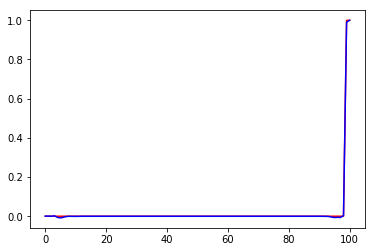

In [7]:
torch.manual_seed(1)    # reproducible

loss_func = nn.MSELoss()

loss_list = []
prediction_list = []
for step in range(10):
    steps = np.linspace(0, 100, 100, dtype=np.float32)
    
    if step <6:
        if step == 0:
            x_np = toeplitz(concatenate([[1.], zeros(99)]),concatenate([[1.,1.,1.], zeros(97)]))[step: 5, :]
            y_np = toeplitz(concatenate([[1.], zeros(99)]),concatenate([[1.,1.,1.], zeros(97)]))[5:6, :] 
        else:
            
            x_np = concatenate([toeplitz(concatenate([[1.], zeros(99)]),concatenate([[1.,1.,1.], zeros(97)]))[step: 5, :],
                                np.array(prediction_list[:step])])
            y_np = toeplitz(concatenate([[1.], zeros(99)]),concatenate([[1.,1.,1.], zeros(97)]))[step+5:step+6, :]
        
    else:
        x_np = np.array(prediction_list[-5:])
        y_np = toeplitz(concatenate([[1.], zeros(99)]),concatenate([[1.,1.,1.], zeros(97)]))[step+5:step+6, :]   
    
    #x_np = steps    # float32 for converting torch FloatTensor
    #y_np = steps
    x = Variable(torch.from_numpy(x_np).float())  # shape (batch, time_step, input_size)
    y = Variable(torch.from_numpy(y_np).float())

    x = x.permute(-1,0).view(1,100,5)
    y = y.view(1,100,1)
    with torch.no_grad():
        prediction = lstmNN(x)
        #print("pre ",prediction.data.size())
        prediction_list.append(prediction.data.view(100).numpy())
        #print(prediction_list)
        loss = loss_func(prediction, y)     # cross entropy loss
        loss_list.append(loss)
    
    #train_loss += loss*X.size(0)
    
    # apply gradients
    plt.figsize=(20, 10)
    plt.ion()
    plt.title(step,fontsize=24)
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    #plt.legend()
    plt.draw()
    plt.pause(0.5)
    plt.clf()

    plt.ioff()
    #plt.show()
plt.plot(steps, y_np.flatten(), 'r-')
plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
plt.show()

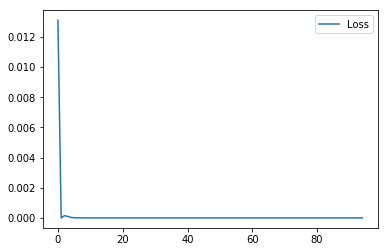

In [8]:
plt.plot(steps[:94], loss_list, label = 'Loss')
plt.legend()
plt.show()

In [ ]:
rnn = nn.LSTM(input_size=1, hidden_size=50, num_layers=2)#(input_size,hidden_size,num_layers)
input0 = torch.randn(66, 1, 1)#(seq_len, batch, input_size)
h0 = torch.randn(2, 1, 50) #(num_layers,batch,output_size)
c0 = torch.randn(2, 1, 50) #(num_layers,batch,output_size)
output, (hn, cn) = rnn(input0, (h0, c0))

print(output.size())

torch.manual_seed(1) 


def forward(self, x, h_n,h_c):
    r_out,  = self.rnn(x, h_state)
    r_out = r_out.view(-1, 32)
    outs = self.out(r_out)
    return outs.view(-1, 10, 1), h_state